In [1]:
# Parameters
file_path = "AMZN.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,134.500000,135.949997,133.220001,135.520004,135.520004,42801000
1,2023-08-24,136.399994,136.779999,131.830002,131.839996,131.839996,43646300
2,2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44147500
3,2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34108400
4,2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100
...,...,...,...,...,...,...,...
247,2024-08-16,177.039993,178.339996,176.259995,177.059998,177.059998,31489200
248,2024-08-19,177.639999,178.300003,176.160004,178.220001,178.220001,31129800
249,2024-08-20,177.919998,179.009995,177.429993,178.880005,178.880005,26255200
250,2024-08-21,179.919998,182.389999,178.889999,180.110001,180.110001,35599100


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,135.520004
1,2023-08-24,131.839996
2,2023-08-25,133.259995
3,2023-08-28,133.139999
4,2023-08-29,134.910004
...,...,...
247,2024-08-16,177.059998
248,2024-08-19,178.220001
249,2024-08-20,178.880005
250,2024-08-21,180.110001


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_87233/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,135.520004
2023-08-24,131.839996
2023-08-25,133.259995
2023-08-28,133.139999
2023-08-29,134.910004
...,...
2024-08-16,177.059998
2024-08-19,178.220001
2024-08-20,178.880005


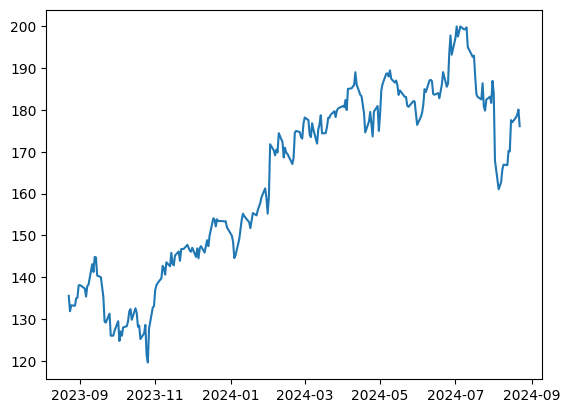

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,135.520004,131.839996,133.259995,133.139999,134.910004,135.070007,138.009995,138.119995,137.270004,...,129.119995,131.270004,125.980003,125.980003,125.980003,127.120003,129.460007,124.720001,127.000000,125.959999
1,2023-10-06,131.839996,133.259995,133.139999,134.910004,135.070007,138.009995,138.119995,137.270004,135.360001,...,131.270004,125.980003,125.980003,125.980003,127.120003,129.460007,124.720001,127.000000,125.959999,127.959999
2,2023-10-09,133.259995,133.139999,134.910004,135.070007,138.009995,138.119995,137.270004,135.360001,137.850006,...,125.980003,125.980003,125.980003,127.120003,129.460007,124.720001,127.000000,125.959999,127.959999,128.259995
3,2023-10-10,133.139999,134.910004,135.070007,138.009995,138.119995,137.270004,135.360001,137.850006,138.229996,...,125.980003,125.980003,127.120003,129.460007,124.720001,127.000000,125.959999,127.959999,128.259995,129.479996
4,2023-10-11,134.910004,135.070007,138.009995,138.119995,137.270004,135.360001,137.850006,138.229996,143.100006,...,125.980003,127.120003,129.460007,124.720001,127.000000,125.959999,127.959999,128.259995,129.479996,131.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,200.000000,199.289993,199.339996,199.789993,195.050003,194.490005,192.720001,193.020004,187.929993,...,161.020004,161.929993,162.770004,165.800003,166.940002,166.800003,170.229996,170.100006,177.589996,177.059998
218,2024-08-19,199.289993,199.339996,199.789993,195.050003,194.490005,192.720001,193.020004,187.929993,183.750000,...,161.929993,162.770004,165.800003,166.940002,166.800003,170.229996,170.100006,177.589996,177.059998,178.220001
219,2024-08-20,199.339996,199.789993,195.050003,194.490005,192.720001,193.020004,187.929993,183.750000,183.130005,...,162.770004,165.800003,166.940002,166.800003,170.229996,170.100006,177.589996,177.059998,178.220001,178.880005
220,2024-08-21,199.789993,195.050003,194.490005,192.720001,193.020004,187.929993,183.750000,183.130005,182.550003,...,165.800003,166.940002,166.800003,170.229996,170.100006,177.589996,177.059998,178.220001,178.880005,180.110001


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

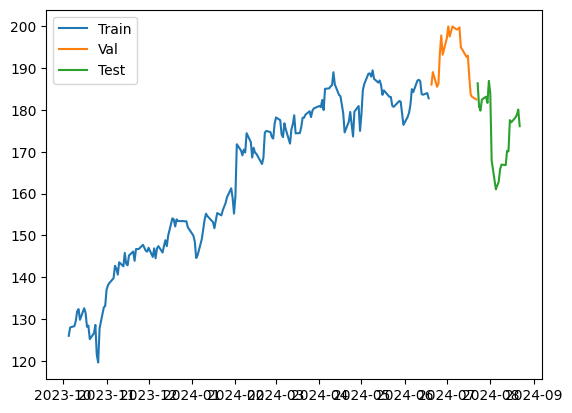

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 4s 812ms/step - loss: 26219.6855 - mean_absolute_error: 160.5567

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 26587.2871 - mean_absolute_error: 161.8327 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 26621.4961 - mean_absolute_error: 161.9770 - val_loss: 36160.9648 - val_mean_absolute_error: 190.0682


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 24350.3242 - mean_absolute_error: 155.0283

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 24742.2891 - mean_absolute_error: 156.1992

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 25056.9238 - mean_absolute_error: 157.1727

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 25125.5879 - mean_absolute_error: 157.3845 - val_loss: 33927.9531 - val_mean_absolute_error: 184.0999


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 23098.3750 - mean_absolute_error: 150.7529

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23112.8516 - mean_absolute_error: 150.7921

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22975.0352 - mean_absolute_error: 150.3126 - val_loss: 28202.7266 - val_mean_absolute_error: 167.8297


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18524.1016 - mean_absolute_error: 134.7164

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17182.8789 - mean_absolute_error: 129.4010

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16758.3281 - mean_absolute_error: 127.6718 - val_loss: 15700.5684 - val_mean_absolute_error: 125.1515


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8530.3516 - mean_absolute_error: 89.8675

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6797.1372 - mean_absolute_error: 77.8949

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6168.5444 - mean_absolute_error: 72.7726 - val_loss: 740.0694 - val_mean_absolute_error: 26.4031


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 720.1951 - mean_absolute_error: 22.3447

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1437.8738 - mean_absolute_error: 30.4214

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1643.6208 - mean_absolute_error: 32.8987 - val_loss: 64.6373 - val_mean_absolute_error: 6.2062


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2319.8474 - mean_absolute_error: 42.1577

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1471.8925 - mean_absolute_error: 30.9981

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1328.3231 - mean_absolute_error: 29.2206 - val_loss: 1788.3113 - val_mean_absolute_error: 41.8493


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 537.1750 - mean_absolute_error: 19.8489

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 688.1772 - mean_absolute_error: 22.4161

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 714.9003 - mean_absolute_error: 22.8152 - val_loss: 2724.0425 - val_mean_absolute_error: 51.8446


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 909.6876 - mean_absolute_error: 26.2091

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 779.1384 - mean_absolute_error: 23.9202

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 745.6036 - mean_absolute_error: 23.3380 - val_loss: 1107.2667 - val_mean_absolute_error: 32.7328


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 298.5233 - mean_absolute_error: 15.1407

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 368.2815 - mean_absolute_error: 16.8749

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 386.9994 - mean_absolute_error: 17.1175 - val_loss: 395.4648 - val_mean_absolute_error: 18.9696


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 469.6442 - mean_absolute_error: 15.6505

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 460.9760 - mean_absolute_error: 16.4243

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 458.4738 - mean_absolute_error: 16.6216 - val_loss: 801.5810 - val_mean_absolute_error: 27.6793


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 286.3990 - mean_absolute_error: 15.3054

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 322.5181 - mean_absolute_error: 16.1871

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 337.5304 - mean_absolute_error: 16.5457 - val_loss: 1336.7676 - val_mean_absolute_error: 36.0761


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 484.5078 - mean_absolute_error: 19.6051

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 448.7079 - mean_absolute_error: 19.0871

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 437.1099 - mean_absolute_error: 18.8146 - val_loss: 1054.0565 - val_mean_absolute_error: 31.9201


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 414.0457 - mean_absolute_error: 18.6199

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 373.2635 - mean_absolute_error: 17.5182

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 372.8071 - mean_absolute_error: 17.5038 - val_loss: 781.5909 - val_mean_absolute_error: 27.3225


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 287.3270 - mean_absolute_error: 15.8079

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 353.5856 - mean_absolute_error: 16.8269

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 358.7890 - mean_absolute_error: 16.9236 - val_loss: 842.8339 - val_mean_absolute_error: 28.4254


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 320.8292 - mean_absolute_error: 15.8673

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 351.0701 - mean_absolute_error: 16.8870

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 353.2643 - mean_absolute_error: 16.9693 - val_loss: 923.3350 - val_mean_absolute_error: 29.8190


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 266.0595 - mean_absolute_error: 15.0057

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 319.6583 - mean_absolute_error: 16.2375

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 328.1156 - mean_absolute_error: 16.4462 - val_loss: 877.7557 - val_mean_absolute_error: 29.0420


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 336.2440 - mean_absolute_error: 16.3030

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 338.7089 - mean_absolute_error: 16.5158

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 334.2642 - mean_absolute_error: 16.4286 - val_loss: 720.9384 - val_mean_absolute_error: 26.2169


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 301.5762 - mean_absolute_error: 14.9627

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 291.0011 - mean_absolute_error: 15.1624

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 292.1550 - mean_absolute_error: 15.2216 - val_loss: 722.7719 - val_mean_absolute_error: 26.2520


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 222.3406 - mean_absolute_error: 13.3593

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 247.1213 - mean_absolute_error: 13.9200

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 251.7643 - mean_absolute_error: 14.0937 - val_loss: 694.1100 - val_mean_absolute_error: 25.7251


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 225.6513 - mean_absolute_error: 13.4619

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 210.9039 - mean_absolute_error: 12.9729

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 208.0912 - mean_absolute_error: 12.8578 - val_loss: 549.5676 - val_mean_absolute_error: 22.7697


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 148.0130 - mean_absolute_error: 11.4366

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 146.2435 - mean_absolute_error: 10.8429

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 144.0806 - mean_absolute_error: 10.6910 - val_loss: 372.8283 - val_mean_absolute_error: 18.5608


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 130.6100 - mean_absolute_error: 9.9351

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 105.8955 - mean_absolute_error: 8.8458

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 98.3634 - mean_absolute_error: 8.5251 - val_loss: 260.3271 - val_mean_absolute_error: 15.3356


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 40.5076 - mean_absolute_error: 5.0691

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 36.4492 - mean_absolute_error: 4.7106

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 34.9146 - mean_absolute_error: 4.5950 - val_loss: 147.0394 - val_mean_absolute_error: 10.9893


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 26.4704 - mean_absolute_error: 4.2498

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 20.5628 - mean_absolute_error: 3.5775

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 19.5816 - mean_absolute_error: 3.4872 - val_loss: 114.9313 - val_mean_absolute_error: 9.6126


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.4273 - mean_absolute_error: 3.1282

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.0242 - mean_absolute_error: 2.7883

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.0522 - mean_absolute_error: 2.7975 - val_loss: 91.3067 - val_mean_absolute_error: 8.3761


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.0745 - mean_absolute_error: 2.4746

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.4984 - mean_absolute_error: 2.5816

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.6108 - mean_absolute_error: 2.5906 - val_loss: 83.2923 - val_mean_absolute_error: 7.9255


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.2438 - mean_absolute_error: 2.2427

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.2099 - mean_absolute_error: 2.5157

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.4106 - mean_absolute_error: 2.6358 - val_loss: 58.2872 - val_mean_absolute_error: 6.4153


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16.5436 - mean_absolute_error: 2.9709

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.5698 - mean_absolute_error: 2.9576

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.9579 - mean_absolute_error: 2.9085 - val_loss: 63.7899 - val_mean_absolute_error: 6.9737


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.8365 - mean_absolute_error: 2.5543

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.9261 - mean_absolute_error: 2.9196

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.0888 - mean_absolute_error: 2.9455 - val_loss: 67.3409 - val_mean_absolute_error: 6.9968


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.7670 - mean_absolute_error: 2.2258

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7551 - mean_absolute_error: 2.4094

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.1256 - mean_absolute_error: 2.4461 - val_loss: 73.0096 - val_mean_absolute_error: 7.3579


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.4328 - mean_absolute_error: 2.7956

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.6501 - mean_absolute_error: 2.9305

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.8486 - mean_absolute_error: 2.9463 - val_loss: 35.4787 - val_mean_absolute_error: 5.0890


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.9991 - mean_absolute_error: 2.5138

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.0574 - mean_absolute_error: 2.9364

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.6172 - mean_absolute_error: 2.9188 - val_loss: 88.4810 - val_mean_absolute_error: 8.3922


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.6313 - mean_absolute_error: 2.4978

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.2073 - mean_absolute_error: 2.6810

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.1358 - mean_absolute_error: 2.6638 - val_loss: 42.2729 - val_mean_absolute_error: 5.5019


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.4601 - mean_absolute_error: 3.0455

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.4831 - mean_absolute_error: 2.8552

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.4137 - mean_absolute_error: 2.7554 - val_loss: 74.1667 - val_mean_absolute_error: 7.4772


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.1742 - mean_absolute_error: 2.3905

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6651 - mean_absolute_error: 2.2775

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4495 - mean_absolute_error: 2.2562 - val_loss: 50.5183 - val_mean_absolute_error: 5.9779


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.4555 - mean_absolute_error: 1.6267

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6228 - mean_absolute_error: 1.9763

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.0597 - mean_absolute_error: 2.0383 - val_loss: 33.6977 - val_mean_absolute_error: 4.9711


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.1607 - mean_absolute_error: 2.5544

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.8503 - mean_absolute_error: 2.5643

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.8122 - mean_absolute_error: 2.5532 - val_loss: 68.0532 - val_mean_absolute_error: 6.9950


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.7187 - mean_absolute_error: 1.7999

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7138 - mean_absolute_error: 2.1762

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.3050 - mean_absolute_error: 2.2526 - val_loss: 46.1038 - val_mean_absolute_error: 5.7799


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.6268 - mean_absolute_error: 2.0490

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4422 - mean_absolute_error: 2.3117

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8778 - mean_absolute_error: 2.3649 - val_loss: 88.8255 - val_mean_absolute_error: 8.3071


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 14.6747 - mean_absolute_error: 3.1197

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.5242 - mean_absolute_error: 3.0553

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.1912 - mean_absolute_error: 3.0214 - val_loss: 69.1351 - val_mean_absolute_error: 7.1521


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.7570 - mean_absolute_error: 2.3167

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.9735 - mean_absolute_error: 2.5215

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.8322 - mean_absolute_error: 2.4897 - val_loss: 46.9993 - val_mean_absolute_error: 5.7626


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.9439 - mean_absolute_error: 2.1266

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.6752 - mean_absolute_error: 2.2026

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.5653 - mean_absolute_error: 2.1764 - val_loss: 56.0118 - val_mean_absolute_error: 6.3881


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.4132 - mean_absolute_error: 2.4410

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.4678 - mean_absolute_error: 2.2716

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.3048 - mean_absolute_error: 2.2316 - val_loss: 52.7033 - val_mean_absolute_error: 6.1282


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.7679 - mean_absolute_error: 2.0150

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.1214 - mean_absolute_error: 2.0299

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2497 - mean_absolute_error: 2.0373 - val_loss: 46.0403 - val_mean_absolute_error: 5.6757


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6242 - mean_absolute_error: 2.1594

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.0333 - mean_absolute_error: 2.1828

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.1515 - mean_absolute_error: 2.1868 - val_loss: 40.4261 - val_mean_absolute_error: 5.3506


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.5851 - mean_absolute_error: 2.2939

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7037 - mean_absolute_error: 2.0992 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.3179 - mean_absolute_error: 2.0752 - val_loss: 50.1684 - val_mean_absolute_error: 5.9817


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.1735 - mean_absolute_error: 2.8610

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.9550 - mean_absolute_error: 2.3023 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.6050 - mean_absolute_error: 2.2450 - val_loss: 36.0695 - val_mean_absolute_error: 5.1063


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.5535 - mean_absolute_error: 2.0445

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.4269 - mean_absolute_error: 1.9779

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.6144 - mean_absolute_error: 1.9759 - val_loss: 37.2151 - val_mean_absolute_error: 5.1609


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.1406 - mean_absolute_error: 1.7719

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.3058 - mean_absolute_error: 1.8705

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.5197 - mean_absolute_error: 1.9078 - val_loss: 47.3729 - val_mean_absolute_error: 5.7837


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.9428 - mean_absolute_error: 2.1260

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5828 - mean_absolute_error: 2.2391

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.3510 - mean_absolute_error: 2.2240 - val_loss: 52.0616 - val_mean_absolute_error: 6.1470


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.6167 - mean_absolute_error: 1.9491

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4618 - mean_absolute_error: 2.0560

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4139 - mean_absolute_error: 2.0497 - val_loss: 48.4734 - val_mean_absolute_error: 5.8593


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.0746 - mean_absolute_error: 2.2870

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4101 - mean_absolute_error: 2.1870

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.1358 - mean_absolute_error: 2.1480 - val_loss: 52.8733 - val_mean_absolute_error: 6.2007


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.4442 - mean_absolute_error: 2.6151

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.1545 - mean_absolute_error: 2.4639

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3084 - mean_absolute_error: 2.4779 - val_loss: 57.3337 - val_mean_absolute_error: 6.5224


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.3084 - mean_absolute_error: 2.3794

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.3817 - mean_absolute_error: 2.3268 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8886 - mean_absolute_error: 2.2589 - val_loss: 40.8351 - val_mean_absolute_error: 5.3587


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.7155 - mean_absolute_error: 1.9182

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.5279 - mean_absolute_error: 2.0531

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.6119 - mean_absolute_error: 2.0654 - val_loss: 39.0515 - val_mean_absolute_error: 5.2639


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.7218 - mean_absolute_error: 1.9373

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.1667 - mean_absolute_error: 2.1340

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.5939 - mean_absolute_error: 2.1935 - val_loss: 65.2614 - val_mean_absolute_error: 7.1235


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.6384 - mean_absolute_error: 3.5909

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.6226 - mean_absolute_error: 2.8745

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.3268 - mean_absolute_error: 2.8296 - val_loss: 66.7388 - val_mean_absolute_error: 7.1905


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.1828 - mean_absolute_error: 2.1631

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.2000 - mean_absolute_error: 2.6616

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.2390 - mean_absolute_error: 2.6475 - val_loss: 32.6115 - val_mean_absolute_error: 4.8786


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.8446 - mean_absolute_error: 2.3131

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.3678 - mean_absolute_error: 2.2586

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.5893 - mean_absolute_error: 2.2721 - val_loss: 37.0528 - val_mean_absolute_error: 5.1719


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.3590 - mean_absolute_error: 1.9524

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1494 - mean_absolute_error: 1.9636

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.5179 - mean_absolute_error: 1.9991 - val_loss: 44.3083 - val_mean_absolute_error: 5.6002


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 14.1798 - mean_absolute_error: 3.0226

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.6466 - mean_absolute_error: 2.6068

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0771 - mean_absolute_error: 2.5285 - val_loss: 72.8879 - val_mean_absolute_error: 7.4568


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.9930 - mean_absolute_error: 2.2793

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.3294 - mean_absolute_error: 2.2519

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4791 - mean_absolute_error: 2.2639 - val_loss: 63.6099 - val_mean_absolute_error: 6.8847


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8892 - mean_absolute_error: 2.0078

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7445 - mean_absolute_error: 2.3258

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.5054 - mean_absolute_error: 2.3041 - val_loss: 42.7968 - val_mean_absolute_error: 5.4886


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.8474 - mean_absolute_error: 1.9984

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4826 - mean_absolute_error: 2.1168

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.6443 - mean_absolute_error: 2.1249 - val_loss: 33.9669 - val_mean_absolute_error: 4.9759


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.0604 - mean_absolute_error: 2.2617

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.7437 - mean_absolute_error: 2.3127

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.6815 - mean_absolute_error: 2.2810 - val_loss: 29.3272 - val_mean_absolute_error: 4.6445


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.2490 - mean_absolute_error: 2.1723

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.9162 - mean_absolute_error: 2.2943

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.2152 - mean_absolute_error: 2.3101 - val_loss: 36.0825 - val_mean_absolute_error: 5.1232


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.3986 - mean_absolute_error: 1.5290

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.1866 - mean_absolute_error: 1.9346

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.9571 - mean_absolute_error: 2.0417 - val_loss: 48.1019 - val_mean_absolute_error: 5.8248


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.6341 - mean_absolute_error: 2.0237

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.1352 - mean_absolute_error: 2.1114

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.9064 - mean_absolute_error: 2.0975 - val_loss: 51.5959 - val_mean_absolute_error: 6.0427


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.2835 - mean_absolute_error: 1.8901

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.0667 - mean_absolute_error: 2.0787

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2549 - mean_absolute_error: 2.0853 - val_loss: 41.0201 - val_mean_absolute_error: 5.4669


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.5528 - mean_absolute_error: 2.0189

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4536 - mean_absolute_error: 1.9901

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.4693 - mean_absolute_error: 2.0107 - val_loss: 36.3021 - val_mean_absolute_error: 5.1880


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.4156 - mean_absolute_error: 2.0751

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.0608 - mean_absolute_error: 1.9142

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.2770 - mean_absolute_error: 1.9235 - val_loss: 34.4222 - val_mean_absolute_error: 5.0622


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.0620 - mean_absolute_error: 2.4701

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 8.5198 - mean_absolute_error: 2.2279 

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.7465 - mean_absolute_error: 2.1377

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.6813 - mean_absolute_error: 2.1184

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.6413 - mean_absolute_error: 2.1103 - val_loss: 30.5575 - val_mean_absolute_error: 4.7649


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 12.6088 - mean_absolute_error: 2.9591

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.1428 - mean_absolute_error: 2.7521

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.4844 - mean_absolute_error: 2.6710 - val_loss: 27.7605 - val_mean_absolute_error: 4.4714


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.2548 - mean_absolute_error: 3.6216

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.9434 - mean_absolute_error: 3.1875

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.0707 - mean_absolute_error: 3.0712 - val_loss: 22.3207 - val_mean_absolute_error: 3.9484


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8055 - mean_absolute_error: 2.1372

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.0229 - mean_absolute_error: 2.4500

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.6103 - mean_absolute_error: 2.5213 - val_loss: 62.6509 - val_mean_absolute_error: 6.8991


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.0686 - mean_absolute_error: 2.4590

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.3939 - mean_absolute_error: 2.3532

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.7893 - mean_absolute_error: 2.3880 - val_loss: 74.2063 - val_mean_absolute_error: 7.7054


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 10.3765 - mean_absolute_error: 2.9158

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.0098 - mean_absolute_error: 3.1625

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.5861 - mean_absolute_error: 2.9103 - val_loss: 40.9692 - val_mean_absolute_error: 5.3670


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.3865 - mean_absolute_error: 2.3794

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.0577 - mean_absolute_error: 2.3807

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.0235 - mean_absolute_error: 2.3456 - val_loss: 36.0985 - val_mean_absolute_error: 5.0880


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.1122 - mean_absolute_error: 1.7042

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.5546 - mean_absolute_error: 1.9726

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.9505 - mean_absolute_error: 2.0258 - val_loss: 32.8491 - val_mean_absolute_error: 4.9013


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.8750 - mean_absolute_error: 1.7813

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.0039 - mean_absolute_error: 1.9953

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.0585 - mean_absolute_error: 2.0112 - val_loss: 34.4652 - val_mean_absolute_error: 4.9800


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.9562 - mean_absolute_error: 2.4702

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.8564 - mean_absolute_error: 2.2834

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.4284 - mean_absolute_error: 2.2255 - val_loss: 35.0752 - val_mean_absolute_error: 5.0361


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.9857 - mean_absolute_error: 1.8989

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.9233 - mean_absolute_error: 2.0410

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8851 - mean_absolute_error: 2.0414 - val_loss: 31.8549 - val_mean_absolute_error: 4.8079


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 7.2964 - mean_absolute_error: 2.1891

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.8344 - mean_absolute_error: 2.0369

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.7923 - mean_absolute_error: 2.0048 - val_loss: 44.4972 - val_mean_absolute_error: 5.5846


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.0306 - mean_absolute_error: 1.7903

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.8201 - mean_absolute_error: 1.9601

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7838 - mean_absolute_error: 1.9569 - val_loss: 41.2660 - val_mean_absolute_error: 5.3624


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8966 - mean_absolute_error: 2.1101

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1956 - mean_absolute_error: 1.9339

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.2475 - mean_absolute_error: 1.9213 - val_loss: 33.6773 - val_mean_absolute_error: 4.9189


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.0968 - mean_absolute_error: 2.4779

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4506 - mean_absolute_error: 2.2883 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8222 - mean_absolute_error: 2.2131 - val_loss: 40.6058 - val_mean_absolute_error: 5.3203


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2280 - mean_absolute_error: 1.5995

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2314 - mean_absolute_error: 1.8564

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.2781 - mean_absolute_error: 1.8680 - val_loss: 39.9566 - val_mean_absolute_error: 5.2793


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.6382 - mean_absolute_error: 1.9578

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7555 - mean_absolute_error: 1.7926

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9878 - mean_absolute_error: 1.8217 - val_loss: 33.5386 - val_mean_absolute_error: 4.9044


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9069 - mean_absolute_error: 2.2179

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.7823 - mean_absolute_error: 1.9215

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.0129 - mean_absolute_error: 1.9254 - val_loss: 33.5330 - val_mean_absolute_error: 4.9023


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.8545 - mean_absolute_error: 2.3148

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.2403 - mean_absolute_error: 2.1006

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.0842 - mean_absolute_error: 2.0650 - val_loss: 27.6203 - val_mean_absolute_error: 4.4988


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.1425 - mean_absolute_error: 2.4277

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.3893 - mean_absolute_error: 2.1712 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.9673 - mean_absolute_error: 2.1241 - val_loss: 38.9669 - val_mean_absolute_error: 5.2185


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4218 - mean_absolute_error: 1.8826

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.9991 - mean_absolute_error: 1.8370

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8164 - mean_absolute_error: 1.8486 - val_loss: 37.3307 - val_mean_absolute_error: 5.1351


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.2780 - mean_absolute_error: 2.0507

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2472 - mean_absolute_error: 1.8986

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.3319 - mean_absolute_error: 1.9037 - val_loss: 28.6611 - val_mean_absolute_error: 4.5840


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.4181 - mean_absolute_error: 2.1160

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.2182 - mean_absolute_error: 2.1890

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4176 - mean_absolute_error: 2.2025 - val_loss: 40.4301 - val_mean_absolute_error: 5.3129


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.5682 - mean_absolute_error: 1.5856

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.2539 - mean_absolute_error: 2.0085

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2599 - mean_absolute_error: 2.0175 - val_loss: 55.3748 - val_mean_absolute_error: 6.4168


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.3628 - mean_absolute_error: 2.0487

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1392 - mean_absolute_error: 1.9080

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.3330 - mean_absolute_error: 1.9072 - val_loss: 34.0824 - val_mean_absolute_error: 4.9506


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.6434 - mean_absolute_error: 2.1463

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.3736 - mean_absolute_error: 1.9337

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.3356 - mean_absolute_error: 1.9111 - val_loss: 38.6631 - val_mean_absolute_error: 5.2236


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.3123 - mean_absolute_error: 2.2094

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.2168 - mean_absolute_error: 1.9478 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.9643 - mean_absolute_error: 1.9430 - val_loss: 37.7755 - val_mean_absolute_error: 5.1592


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.4392 - mean_absolute_error: 1.9572

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9351 - mean_absolute_error: 1.8593

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.4105 - mean_absolute_error: 1.9182 - val_loss: 38.1226 - val_mean_absolute_error: 5.1768


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


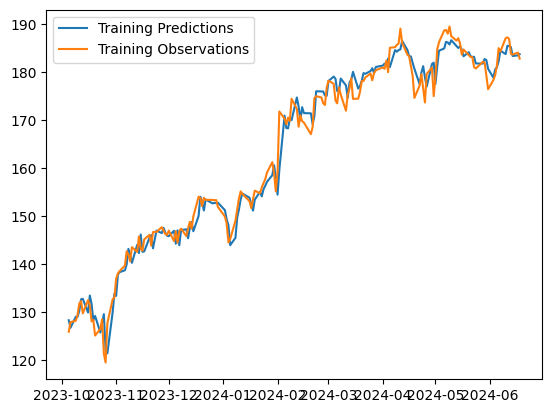

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + "training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


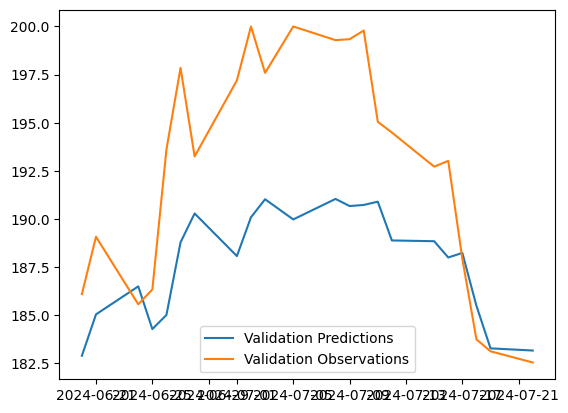

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + "validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


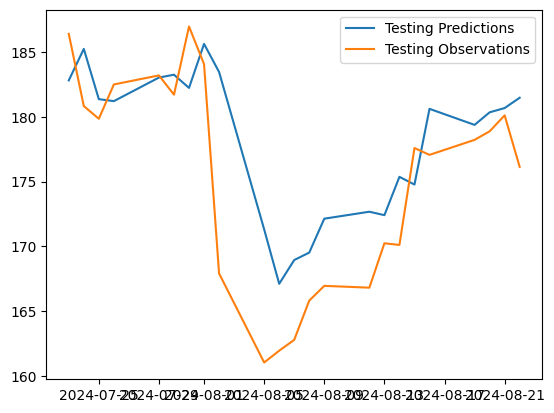

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + "testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
